In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "zyQducS5EcZHkArKr71PVpUNR"
Consumer_Secret_Key = "cTgRhiFFI2MyC6tG5Ggu1piks9bRJc3hLWMLrioslg4PSr3waa"
Access_Token = "1456570231535509505-8rfuFD99BSSlUN0UFvcEojkLp4Ba5s"
Access_Token_Secret = "EHvo26m87feWSJn9d5b5yaedXEVnOHimFt4YtLaLV6RjY"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="telkomsel", count = 1000, lang="en", tweet_mode="extended")
# Print the last 10 tweets
print("Show the 10 recent tweets :\n")
i=1
for tweet in posts[:10]:
  print(str(i)+') '+tweet.full_text + '\n')
  i = i+1

Show the 10 recent tweets :

1) @YudiSet06957312 Hi, Kak Yudi. Maaf ya. Terkait keluhan ketidaksesuaian penggunaan kuota, yuk infoin No.HP, tgl &amp; waktu kejadian, lokasi kejadian, jenis paket yg aktif via DM agar privasi terjaga dan bisa dicek. Makasih :)-Nuri

2) @NanangA40002050 Hi, Kak Nanang. Maaf ya. Terkait keluhan penggunaan kuota, yuk infoin No.HP via DM agar privasi terjaga dan bisa dicek. Makasih :)-Nuri

3) @graekz Baik, Kak. Maaf ya. Agar mimin bisa bantu perbaiki dan kendala Kakak bisa terselesaikan, yuk infoin detail kendalanya. Pasti mimin bantu Kak. Makasih🙂 - Khasa

4) @hannahanut Hai, Kak Hana . Mimin cek DM Kakak sudah masuk dalam antrian. Mohon untuk menunggu interaksi berikutnya ya Kak. Makasih :) - Nuri

5) @deyzahir Hai, Kak Zahir. Maaf ya. Jika ada pertanyaan atau kendala seputar Telkomsel, boleh infoin lebih detail keluhan atau pertanyaannya? agar mimin bisa memberikan solusi yang tepat. Makasih 🙂 - Khasa

6) @o_lennn Hai, Kak. Mimin cek DM Kakak sudah masuk

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 15 rows of data
df.head()

,Tweets
0,"@YudiSet06957312 Hi, Kak Yudi. Maaf ya. Terkai..."
1,"@NanangA40002050 Hi, Kak Nanang. Maaf ya. Terk..."
2,"@graekz Baik, Kak. Maaf ya. Agar mimin bisa ba..."
3,"@hannahanut Hai, Kak Hana . Mimin cek DM Kakak..."
4,"@deyzahir Hai, Kak Zahir. Maaf ya. Jika ada pe..."


In [ ]:
def cleanTxt(text):
   text = re.sub('@[A-Za-z0-9]+', '', text) #Removing @mentions
   text = re.sub('@', '', text)
   text = re.sub('RT[\s]+','', text)
   text = re.sub('https?:\/\/\S+', text)

   return text
   
   #Clean the Tweets
   df['Tweets'] = df['Tweets'].apply(cleanTxt)

   # Show the cleaned tweets
   df

In [ ]:
# create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create two new columns 'subjectivity  & polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show new dataframe
df

,Tweets,Subjectivity,Polarity
0,"@YudiSet06957312 Hi, Kak Yudi. Maaf ya. Terkai...",1.0,0.5
1,"@NanangA40002050 Hi, Kak Nanang. Maaf ya. Terk...",1.0,0.5
2,"@graekz Baik, Kak. Maaf ya. Agar mimin bisa ba...",0.0,0.0
3,"@hannahanut Hai, Kak Hana . Mimin cek DM Kakak...",1.0,0.5
4,"@deyzahir Hai, Kak Zahir. Maaf ya. Jika ada pe...",0.0,0.0
...,...,...,...
195,"@zikrul_amar 2. Tgl dan waktu kejadian,\n3. Lo...",0.0,0.0
196,@zikrul_amar pelanggan. Lalu untuk keluhan ja...,0.0,0.0
197,"@rpgoe Hai, Kak Padi. Maaf ya jadi ga nyaman. ...",0.0,0.0
198,"@zikrul_amar Hai, Kak Zikrul. Maaf jadi buat K...",0.0,0.0


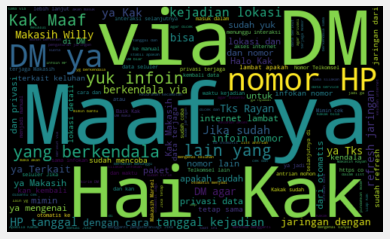

In [ ]:
# word cloud visualization
allWords = ' ' .join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):


 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
 # Show the data frame
df  

,Tweets,Subjectivity,Polarity,Analysis
0,"@YudiSet06957312 Hi, Kak Yudi. Maaf ya. Terkai...",1.0,0.5,Positive
1,"@NanangA40002050 Hi, Kak Nanang. Maaf ya. Terk...",1.0,0.5,Positive
2,"@graekz Baik, Kak. Maaf ya. Agar mimin bisa ba...",0.0,0.0,Neutral
3,"@hannahanut Hai, Kak Hana . Mimin cek DM Kakak...",1.0,0.5,Positive
4,"@deyzahir Hai, Kak Zahir. Maaf ya. Jika ada pe...",0.0,0.0,Neutral
...,...,...,...,...
195,"@zikrul_amar 2. Tgl dan waktu kejadian,\n3. Lo...",0.0,0.0,Neutral
196,@zikrul_amar pelanggan. Lalu untuk keluhan ja...,0.0,0.0,Neutral
197,"@rpgoe Hai, Kak Padi. Maaf ya jadi ga nyaman. ...",0.0,0.0,Neutral
198,"@zikrul_amar Hai, Kak Zikrul. Maaf jadi buat K...",0.0,0.0,Neutral


In [ ]:
print('negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

negative tweets:

1) @kaptenblink Jika sudah dan tetap sama, silakan Kakak infokan data berikut via DM agar dibantu cek dan privasi data terjaga:
1. Nomor HP berkendala
2. Lokasi detail minimal informasi kelurahan, kecamatan dan kota
3. 3 Nomor Telkomsel lain yang berkendala. (2/3)

2) @tiwvai Jika sudah dan tetap sama, silakan Kakak infokan data berikut via DM agar dibantu cek lebih lanjut dan privasi data terjaga:
1. Nomor HP berkendala
2. Tanggal dan waktu kejadian
3. Lokasi detail minimal informasi kelurahan, kecamatan dan kota
 (2/3)

3) @tiwvai 4. Nomor Telkomsel lain yang berkendala. Jika saat ini sedang berada di lokasi yang berkendala, Kakak bisa kirim long latitude yang terdapat di Google Maps melalui DM agar Mimin bisa mengecek lebih akurat. Tks 😉-Kim (3/3)

4) @rizallo9 agar dibantu cek lebih lanjut dan privasi data terjaga:
1. Nomor HP berkendala
2. Agar memudahkan dalam pengecekan, boleh info lebih detail waktu kejadiannya
3. Lokasi detail minimal informasi kelurahan, kec

In [ ]:
print('positive tweet:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

positive tweet:

1) @YudiSet06957312 Hi, Kak Yudi. Maaf ya. Terkait keluhan ketidaksesuaian penggunaan kuota, yuk infoin No.HP, tgl &amp; waktu kejadian, lokasi kejadian, jenis paket yg aktif via DM agar privasi terjaga dan bisa dicek. Makasih :)-Nuri

2) @NanangA40002050 Hi, Kak Nanang. Maaf ya. Terkait keluhan penggunaan kuota, yuk infoin No.HP via DM agar privasi terjaga dan bisa dicek. Makasih :)-Nuri

3) @hannahanut Hai, Kak Hana . Mimin cek DM Kakak sudah masuk dalam antrian. Mohon untuk menunggu interaksi berikutnya ya Kak. Makasih :) - Nuri

4) @o_lennn Hai, Kak. Mimin cek DM Kakak sudah masuk dalam antrian. Mohon untuk menunggu interaksi berikutnya ya Kak. Makasih :) - Nuri

5) @Ray_Geek94 Hai, Kak. Maaf ya. Terkait keluhan internet lambat, yuk infoin data yang diminta rekan mimin via DM agar dapat mimin bantu cek dan privasi data Kakak tetap terjaga. Makasih :) -Willy

6) @Ray_Geek94 No. Telkomsel yg berkendala sama via DM agar dicek dan privasi data terjaga. Tks :) -Nuri (2/

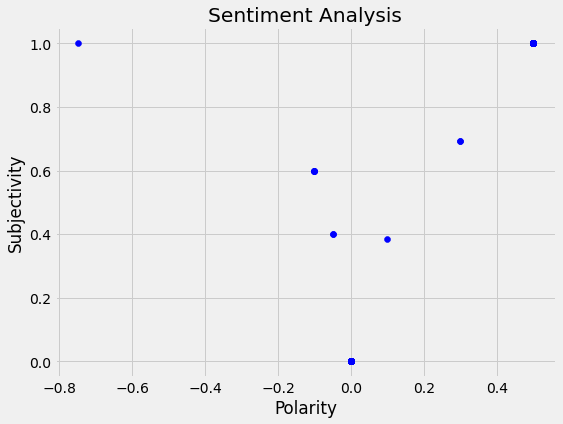

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round((ptweets.shape[0] / df.shape[0]) * 100 , 1)

55.0

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round((ntweets.shape[0] / df.shape[0]) * 100 , 1)

4.0

In [ ]:
df['Analysis'].value_counts()

Positive    110
Neutral      82
Negative      8
Name: Analysis, dtype: int64

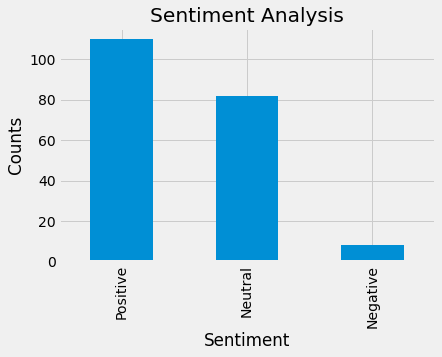

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind= 'bar')
plt.show()

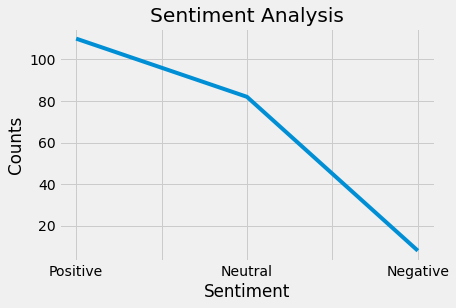

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind= 'line')
plt.show()